In [1]:
push!(LOAD_PATH,"./") # Temporary versions of modules in PWD
using SMASH

Reconstituting the Glazer tilt notation for Perovskites from sampling molecular dynamics
S*M*A*S*H: Standard (+) Mash (-) Ability (0) Suitable (-) Holonomy (0) 


In [2]:
# Test routines...
f=open("testmd2-nonselective_XDATCAR","r")
t=SMASH.read_XDATCAR(f) #Returns type XDATCAR.Trajcetory

[12.58017 7.8e-5 -0.039648
 7.7e-5 12.547782 -0.000152
 -0.039643 -0.000153 12.594017]
Any["C","C","C","C","C","C","C","C","N","N","N","N","N","N","N","N","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","H","Pb","Pb","Pb","Pb","Pb","Pb","Pb","Pb","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I","I"]

SMASH.Trajectory(3x3 Array{Float64,2}:
 12.5802     7.8e-5    -0.039648
  7.7e-5    12.5478    -0.000152
 -0.039643  -0.000153  12.594   ,96,Any[
96x3 Array{Float64,2}:
 0.435686    0.502289    0.537987  
 0.0384272   0.496792    0.481136  
 0.475055    0.992787    0.435311  
 0.884007    0.0101009   0.406121  
 0.433606    0.478391    0.981432  
 0.00044637  0.53534     0.9768    
 0.452638    0.954096    0.0307284 
 0.94944     0.933017    0.970214  
 0.920492    0.450058    0.980038  
 0.417327    0.403166    0.890928  
 0.995614    0.0424506   0.959852  
 0.534015    0.872565    0.00062645
 0.965996    0.491239    0.573089  
 ⋮                                 
 0.183042    0.00748097  0.75382   
 0.714837    0.0123615   0.787735  
 0.188532    0.506891    0.783251  
 0.763557    0.512504    0.756765  
 0.457475    0.270912    0.328908  
 0.973072    0.262405    0.151309  
 0.511545    0.756153    0.235399  
 0.985819    0.702559    0.235153  
 0.44877     0.201259    0.66427   
 0.

In [3]:
using PyPlot

INFO: Recompiling stale cache file /home/jarvist/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/jarvist/.julia/lib/v0.4/SHA.ji for module SHA.
INFO: Recompiling stale cache file /home/jarvist/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/jarvist/.julia/lib/v0.4/BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file /home/jarvist/.julia/lib/v0.4/URIParser.ji for module URIParser.
INFO: Recompiling stale cache file /home/jarvist/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/jarvist/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.
/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


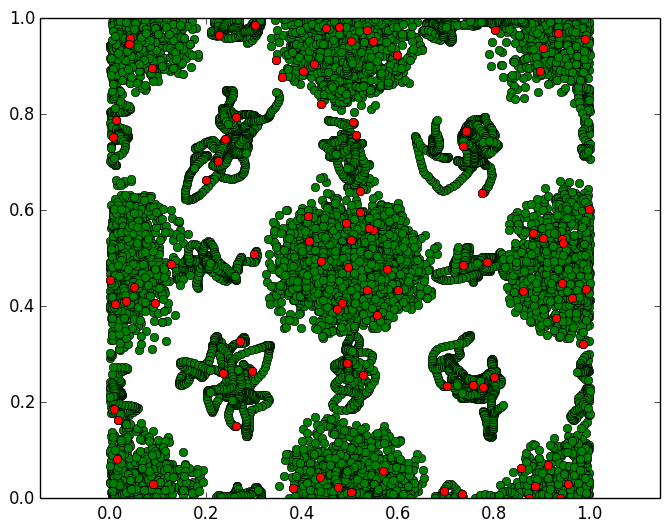

(0.0,1.0,0.0,1.0)

In [4]:
[ plot(t.frames[i][:,2],t.frames[i][:,3],"go") for i in 1:123]
plot(t.frames[1][:,2],t.frames[1][:,3],"ro")
ax1 = axes()
ax1[:axis]("equal")

In [13]:
t.atomlookup.=="Pb"

96-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [6]:
getindex(t.atomlookup)

"C"

In [14]:
t.atomlookup[t.atomlookup .=="Pb"]

8-element Array{Any,1}:
 "Pb"
 "Pb"
 "Pb"
 "Pb"
 "Pb"
 "Pb"
 "Pb"
 "Pb"

In [17]:
t.frames[1][t.atomlookup .=="Pb",:]

8x3 Array{Float64,2}:
 0.224966  0.235892  0.26068 
 0.749575  0.29542   0.265736
 0.231558  0.776609  0.231495
 0.747758  0.800518  0.252419
 0.20653   0.225851  0.70252 
 0.69052   0.239432  0.748666
 0.242031  0.736513  0.734865
 0.743797  0.742294  0.768286

In [22]:
for i in 1
    for Pbsite in t.frames[i][t.atomlookup .=="Pb",:]
        println("    Pbsite: ",Pbsite)
        for Isite in t.frames[i][t.atomlookup .=="I",:]
            println("Pbsite: ",Pbsite," Isite: ",Isite," Diff: ",Pbsite-Isite)
        end
    end
end


    Pbsite: 0.22496633
Pbsite: 0.22496633 Isite: 0.20383233 Diff: 0.021133999999999986
Pbsite: 0.22496633 Isite: 0.80169732 Diff: -0.57673099
Pbsite: 0.22496633 Isite: 0.29960317 Diff: -0.07463683999999998
Pbsite: 0.22496633 Isite: 0.71520084 Diff: -0.49023450999999996
Pbsite: 0.22496633 Isite: 0.2343383 Diff: -0.009371970000000007
Pbsite: 0.22496633 Isite: 0.67864106 Diff: -0.45367473
Pbsite: 0.22496633 Isite: 0.30425021 Diff: -0.07928388000000003
Pbsite: 0.22496633 Isite: 0.76028742 Diff: -0.53532109
Pbsite: 0.22496633 Isite: 0.13615914 Diff: 0.08880718999999998
Pbsite: 0.22496633 Isite: 0.69008388 Diff: -0.46511755
Pbsite: 0.22496633 Isite: 0.24447415 Diff: -0.01950782000000001
Pbsite: 0.22496633 Isite: 0.69840487 Diff: -0.47343853999999996
Pbsite: 0.22496633 Isite: 0.183042 Diff: 0.04192432999999998
Pbsite: 0.22496633 Isite: 0.71483652 Diff: -0.48987019
Pbsite: 0.22496633 Isite: 0.18853205 Diff: 0.036434279999999986
Pbsite: 0.22496633 Isite: 0.76355741 Diff: -0.53859108
Pbsite: 0.2

In [34]:
# iterate over frames, calculate distnaces between Pb and I. Doesn't use PBCs currently!
for i in 1
    Pbs=t.frames[i][t.atomlookup .=="Pb",:]
    Is=t.frames[i][t.atomlookup .=="I",:]
    
    for j=1:size(Pbs,1)
        Pb=Pbs[j,:]
        print("Pb: ",Pb)
        for k=1:size(Is,1)
            I=Is[k,:]

            #println("Pb: ",Pb," I: ",I," Diff: ",Pb-I, " Norm: ",norm(Pb-I))
            if (norm(Pb-I)<0.5) # MAGIC NUMBER
                print(" ",norm(Pb-I))
            end
        end
        println()
    end

end

Pb: [0.22496633 0.2358923 0.26068022] 0.2523961970873279 0.25581888621174903 0.25948359488983924 0.24483022274054606 0.462787533804361
Pb: [0.7495754 0.29542007 0.26573606] 0.2501152998111091 0.472940658926484 0.3026025966873609 0.23673248773544947 0.29985638599796804 0.2532477392508905 0.4717083097533602
Pb: [0.23155768 0.77660925 0.23149479] 0.26730129320782026 0.2386411601716106 0.28743422476433683 0.28076032491155123
Pb: [0.74775756 0.80051801 0.25241855] 0.2435432955983525 0.2593635402964752 0.2785795267730789 0.2409449982589998 0.2580068086319198 0.45875631408047624
Pb: [0.20653029 0.22585079 0.70252008] 0.23639834065459808 0.2637670125254646 0.22554109264163394 0.29295941344223164 0.4523159559550803 0.24647124204916585
Pb: [0.69052011 0.23943186 0.74866594] 0.2701270420622819 0.2455256422814988 0.23168653055077804 0.28278654174100254 0.48114181157953484 0.258887736021333 0.2715839200773327
Pb: [0.24203054 0.73651261 0.73486467] 0.2546596368014411 0.240685093386426 0.265966319403

In [48]:
# minimimum distance image convention; using a unitcell=3x3, with a and b vectors in fractional coords
function minimd(a, b, unitcell)
    d=(b-a)*unitcell
    d=d-round(d/unitcell)*unitcell
    d # returns in units of the unitcell; i.e. Angstrom
end

minimd (generic function with 1 method)

In [56]:
# iterate over frames, calculate distnaces between Pb and I. Doesn't use PBCs currently!
for i in 1
    Pbs=t.frames[i][t.atomlookup .=="Pb",:]
    Is=t.frames[i][t.atomlookup .=="I",:]
    
    for j=1:size(Pbs,1)
        Pb=Pbs[j,:]
        print("\nPb: at ",Pb," Fractional ")
        for k=1:size(Is,1)
            I=Is[k,:]

            #println("Pb: ",Pb," I: ",I," Diff: ",Pb-I, " Norm: ",norm(Pb-I))
            if (norm(minimd(Pb,I,t.cell))<4) # MAGIC NUMBER; Pb-I distance angstroms
                #@printf(" %0.3f",norm(minimd(Pb,I,t.cell)))
                myd=minimd(Pb,I,t.cell)
                @printf("\n d=%0.3f\n\t%0.3f x %0.3f y %0.3f z",norm(myd),myd[1],myd[2],myd[3] )
            end
        end
        println()

    end

end


Pb: at [0.22496633 0.2358923 0.26068022] Fractional 
 d=3.178
	-0.275 x -1.361 y 2.859 z
 d=3.731
	0.130 x -0.115 y -3.726 z
 d=3.210
	-1.114 x -2.859 y -0.942 z
 d=3.256
	0.245 x 3.236 y 0.259 z
 d=3.075
	2.922 x 0.439 y 0.850 z
 d=3.463
	-3.165 x 0.333 y -1.367 z

Pb: at [0.7495754 0.29542007 0.26573606] Fractional 
 d=3.146
	0.646 x 0.070 y 3.078 z
 d=3.630
	-0.881 x 0.075 y -3.521 z
 d=3.797
	-0.744 x -3.493 y -1.291 z
 d=2.971
	-0.643 x 2.898 y -0.112 z
 d=3.777
	-3.677 x -0.308 y 0.807 z
 d=3.194
	2.816 x -0.414 y -1.450 z

Pb: at [0.23155768 0.77660925 0.23149479] Fractional 
 d=3.361
	0.846 x -0.508 y 3.213 z
 d=3.010
	0.923 x -0.538 y -2.814 z
 d=3.194
	-1.198 x 2.904 y -0.575 z
 d=3.607
	0.160 x -3.548 y 0.627 z
 d=3.532
	3.522 x -0.257 y 0.038 z
 d=3.229
	-3.092 x -0.929 y 0.056 z

Pb: at [0.74775756 0.80051801 0.25241855] Fractional 
 d=3.070
	-0.419 x -0.188 y 3.035 z
 d=3.265
	0.167 x -1.306 y -2.988 z
 d=3.028
	-0.722 x 2.717 y -1.123 z
 d=3.496
	-0.621 x -3.440 y 0.055

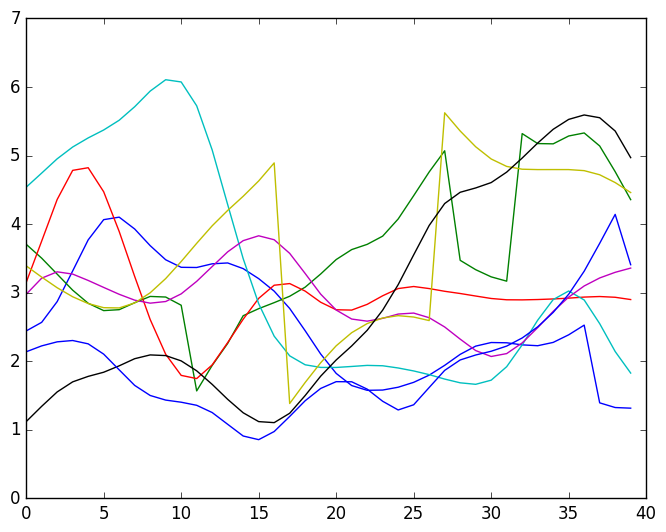

In [126]:
# iterate over frames, calculate distnaces between Pb and I. Doesn't use PBCs currently!
tally=Float64[]
for i in 1:sizeof(t)
    Pbs=t.frames[i][t.atomlookup .=="Pb",:]
    Is=t.frames[i][t.atomlookup .=="I",:]
    
    for j=1:size(Pbs,1)
        Pb=Pbs[j,:]
        tot=[0 0 0]
        #print("Pb: at ",Pb," Fractional \n")
        for k=1:size(Is,1)
            I=Is[k,:]

            #println("Pb: ",Pb," I: ",I," Diff: ",Pb-I, " Norm: ",norm(Pb-I))
            if (norm(minimd(Pb,I,t.cell))<4) # MAGIC NUMBER; Pb-I distance angstroms
                #@printf(" %0.3f",norm(minimd(Pb,I,t.cell)))
                myd=minimd(Pb,I,t.cell)
                #show(myd)
                tot+=myd
                #@printf("\n d=%0.3f\n\t%0.3f x %0.3f y %0.3f z",norm(myd),myd[1],myd[2],myd[3] )
            end
        end
        #@printf("\nTotal sum of vectors; norm: %0.3f x=%0.3f y=%0.3f z=%0.3f \n",norm(tot),tot[1],tot[2],tot[3])
        push!(tally,norm(tot))
    end

end

#PyPlot.plot(tally)
for i in 1:8
    plot(tally[i:8:end])
end


In [120]:
tally[1:8:end]

40-element Array{Float64,1}:
 2.4427 
 2.5683 
 2.87089
 3.31772
 3.77077
 4.06575
 4.1022 
 3.92954
 3.68656
 3.48069
 3.37065
 3.36806
 3.42161
 ⋮      
 2.1014 
 2.22134
 2.27378
 2.27008
 2.2397 
 2.2272 
 2.27552
 2.38623
 2.5275 
 1.39406
 1.32582
 1.31654